In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.pyplot import get_cmap
import matplotlib.patches as mpatches
import seaborn as sns


In [376]:
df = pd.read_excel("Earnie_Junk.xlsx")#Reads in the excel file as df
df= df.replace('Yes',"Willing to invest").replace("No","Not Willing to invest").replace("Pre","Before Sumamry").replace("Post", "After Summary")
df.head()


,Company,Subject,Pre_Post,Opinion,Conf,Rating,u_conf
0,Twitter,1,Before Sumamry,Not Willing to invest,9,Negative,-9
1,Twitter,1,After Summary,Not Willing to invest,10,Negative,-10
2,Twitter,2,Before Sumamry,Not Willing to invest,6,Negative,-6
3,Twitter,2,After Summary,Not Willing to invest,8,Negative,-8
4,Twitter,3,Before Sumamry,Not Willing to invest,5,Negative,-5


In [407]:
Meta = df.groupby(df['Company']).get_group('Meta')
Meta['Person'] = Meta['Subject'].astype(str)+ Meta['Pre_Post']
Twitter = df.groupby(df['Company']).get_group('Twitter')
Twitter['Person'] = Twitter['Subject'].astype(str)+ Twitter['Pre_Post']
Walmart = df.groupby(df['Company']).get_group('Walmart')
Walmart['Person'] = Walmart['Subject'].astype(str)+ Walmart['Pre_Post']
Puma = df.groupby(df['Company']).get_group('Puma')
Puma['Person'] = Puma['Subject'].astype(str)+ Puma['Pre_Post']
Binance = df.groupby(df['Company']).get_group('Binance')
Binance['Person'] = Binance['Subject'].astype(str)+ Binance['Pre_Post']
Hermes = df.groupby(df['Company']).get_group('Hermes')
Hermes['Person'] = Hermes['Subject'].astype(str)+ Hermes['Pre_Post']
Airbnb = df.groupby(df['Company']).get_group('Airbnb')
Airbnb['Person'] = Airbnb['Subject'].astype(str)+ Airbnb['Pre_Post']
Westinghouse = df.groupby(df['Company']).get_group('Westinghouse')
Westinghouse['Person'] = Westinghouse['Subject'].astype(str)+ Westinghouse['Pre_Post']
Mcdonald = df.groupby(df['Company']).get_group('Mcdonald')
Mcdonald['Person'] = Mcdonald['Subject'].astype(str)+ Mcdonald['Pre_Post']
Netflix = df.groupby(df['Company']).get_group('Netflix')
Netflix['Person'] = Netflix['Subject'].astype(str)+ Netflix['Pre_Post']
Buy = df.groupby(df['Rating']).get_group('Positive')
Sell = df.groupby(df['Rating']).get_group('Negative')
Neutral = df.groupby(df['Rating']).get_group('Neutral')

Buy

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/3392234288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Meta['Person'] = Meta['Subject'].astype(str)+ Meta['Pre_Post']
/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/3392234288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter['Person'] = Twitter['Subject'].astype(str)+ Twitter['Pre_Post']
/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/3392234288.py:6: SettingWithCopyWarning: 
A value is try

,Company,Subject,Pre_Post,Opinion,Conf,Rating,u_conf
52,Puma,1,Before Sumamry,Not Willing to invest,5,Positive,-5
53,Puma,1,After Summary,Willing to invest,6,Positive,6
54,Puma,2,Before Sumamry,Willing to invest,7,Positive,7
55,Puma,2,After Summary,Not Willing to invest,5,Positive,-5
56,Puma,3,Before Sumamry,Willing to invest,7,Positive,7
...,...,...,...,...,...,...,...
255,Netflix,11,After Summary,Willing to invest,8,Positive,8
256,Netflix,12,Before Sumamry,Willing to invest,8,Positive,8
257,Netflix,12,After Summary,Willing to invest,9,Positive,9
258,Netflix,13,Before Sumamry,Not Willing to invest,10,Positive,-10


In [285]:

def plot_Company(Name):
    #create grouped bar chart
    g = sns.barplot(x = 'Person', y = "Conf", hue = "Opinion",palette=["#1DB954", "black"],dodge=False, data = Name)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), size=6,
                    textcoords = 'offset points')
    new_xticks=['1 Pre', '1 Post','2 Pre', '2 Post','3 Pre', '3 Post','4 Pre', '4 Post','4 Pre', '4 Post','5 Pre', '5 Post','6 Pre', '7 Post','7 Pre', '8 Post','9 Pre', '9 Post','10 Pre', '10 Post','11 Pre', '11 Post','12 Pre', '12 Post','13 Pre', '13 Post']
    #rotate x-axis labels
    locs, labels=plt.xticks()
    plt.legend( prop={'size': 8},loc='lower left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.xticks(locs,new_xticks,rotation=75)
    plt.xlabel('Person pre summary and post summary')
    plt.ylabel('Confidence in decision')
    plt.title('Consumer Opinions for '+ Name.iat[0, 0])
    return plt.figure()

In [419]:
def plot_Data(Name):
    #create grouped bar chart
    g = sns.barplot(x = 'Rating', y = 'Conf', hue = "Pre_Post",palette=["#1DB954", "black"], ci= False, data = Name)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), size=6,
                    textcoords = 'offset points')
    #rotate x-axis labels
    locs, labels=plt.xticks()
    plt.legend( prop={'size': 8},loc='lower left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.xlabel('Person pre summary and post summary')
    plt.ylabel('Average Confidence in decision')
    plt.title('Experiment One Overview')
    return plt.figure()

In [415]:
def plot_Opinion(Name):
    #create grouped bar chart
    g = sns.barplot(x = 'Opinion', y = 'u_conf', hue = "Pre_Post",palette=["#1DB954", "blue"], ci= False, data = Name)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), size=6,
                    textcoords = 'offset points')
    #rotate x-axis labels
    locs, labels=plt.xticks()
    Buy = 'Willing to invest ['+ Name['Opinion'].value_counts(ascending=True)[0].astype(str)+"]"
    Sell = 'Not Willing to invest [' + Name['Opinion'].value_counts(ascending=True)[1].astype(str)+"]"
    new_xticks=[ Sell, Buy ]
    plt.legend( prop={'size': 8},loc='lower left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.xticks(locs,new_xticks)
    plt.xlabel('People pre and post reading Earnie')
    plt.ylabel('Average Confidence in decision')
    plt.title(Name.iat[5, 5]+" "+ "Sentiment")
    return plt.figure()
    

In [287]:
def stats(Name):
    post = Name.groupby(Name['Pre_Post']).get_group('After Summary').describe()
    pre = Name.groupby(Name['Pre_Post']).get_group('Before Sumamry').describe()
    diff = np.subtract(post["Conf"],pre["Conf"])
    return (pre["Conf"], post["Conf"], diff)

In [372]:
def data_stats():
    post = df.groupby(df['Pre_Post']).get_group('After Summary').describe()
    pre = df.groupby(df['Pre_Post']).get_group('Before Sumamry').describe()
    diff = np.subtract(post["Conf"],pre["Conf"])
    return (pre["Conf"], post["Conf"], diff)

In [335]:
def opinion_stats(Name):
    post = df.groupby(Name['Pre_Post']).get_group('After Summary').describe()
    pre = df.groupby(Name['Pre_Post']).get_group('Before Sumamry').describe()
    diff = np.subtract(post["Conf"],pre["Conf"])
    return (pre["Conf"], post["Conf"], diff)

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/3975759055.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(x = 'Rating', y = 'Conf', hue = "Pre_Post",palette=["#1DB954", "black"], ci= False, data = Name)


(count    130.000000
 mean       7.069231
 std        1.996852
 min        1.000000
 25%        6.000000
 50%        7.000000
 75%        8.750000
 max       10.000000
 Name: Conf, dtype: float64,
 count    130.000000
 mean       7.623077
 std        2.012617
 min        1.000000
 25%        7.000000
 50%        8.000000
 75%        9.000000
 max       10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.553846
 std      0.015765
 min      0.000000
 25%      1.000000
 50%      1.000000
 75%      0.250000
 max      0.000000
 Name: Conf, dtype: float64)

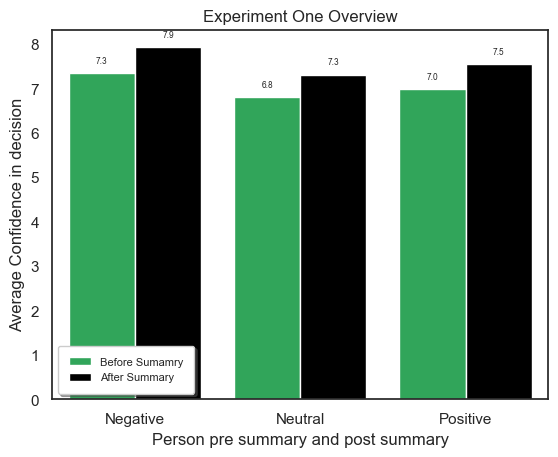

<Figure size 640x480 with 0 Axes>

In [420]:
plot_Data(df)
data_stats()

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/1055618782.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(x = 'Opinion', y = 'u_conf', hue = "Pre_Post",palette=["#1DB954", "blue"], ci= False, data = Name)


<Figure size 640x480 with 0 Axes>

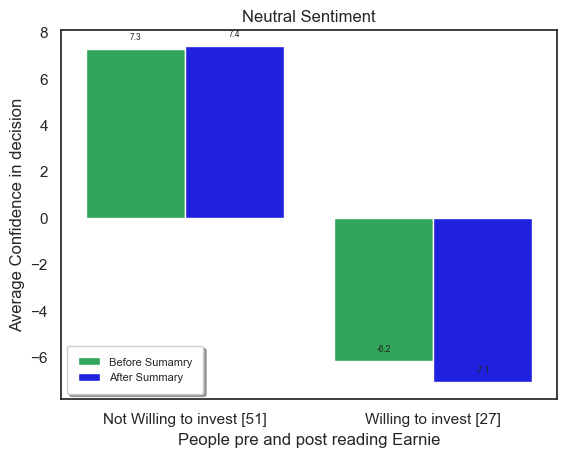

<Figure size 640x480 with 0 Axes>

In [421]:
plot_Opinion(Neutral)

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/1055618782.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(x = 'Opinion', y = 'u_conf', hue = "Pre_Post",palette=["#1DB954", "blue"], ci= False, data = Name)


<Figure size 640x480 with 0 Axes>

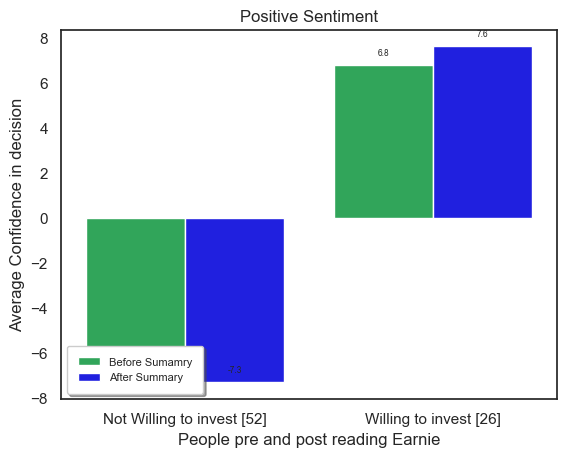

<Figure size 640x480 with 0 Axes>

In [422]:
plot_Opinion(Buy)

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_58293/1055618782.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(x = 'Opinion', y = 'u_conf', hue = "Pre_Post",palette=["#1DB954", "blue"], ci= False, data = Name)


<Figure size 640x480 with 0 Axes>

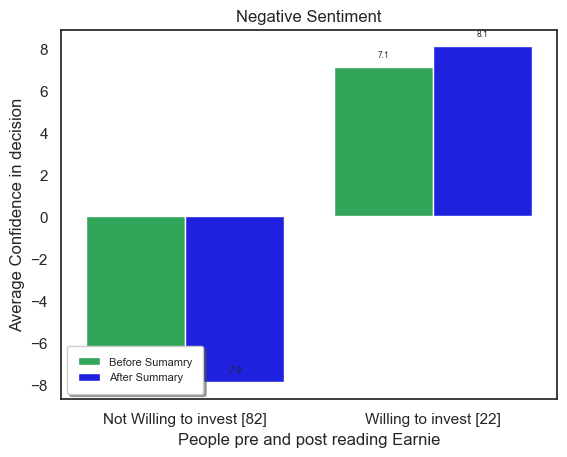

<Figure size 640x480 with 0 Axes>

In [423]:
plot_Opinion(Sell)

(count    13.000000
 mean      7.384615
 std       2.433737
 min       4.000000
 25%       5.000000
 50%       8.000000
 75%      10.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      7.692308
 std       2.496151
 min       2.000000
 25%       7.000000
 50%       8.000000
 75%      10.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.307692
 std      0.062414
 min     -2.000000
 25%      2.000000
 50%      0.000000
 75%      0.000000
 max      0.000000
 Name: Conf, dtype: float64)

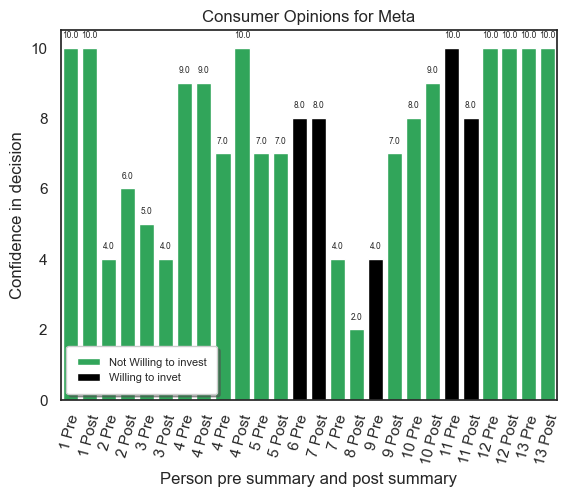

<Figure size 640x480 with 0 Axes>

In [279]:
plot_Company(Meta)
stats(Meta)

(count    13.000000
 mean      7.307692
 std       2.496151
 min       1.000000
 25%       6.000000
 50%       8.000000
 75%       9.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      8.000000
 std       2.677063
 min       1.000000
 25%       8.000000
 50%       8.000000
 75%      10.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.692308
 std      0.180912
 min      0.000000
 25%      2.000000
 50%      0.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

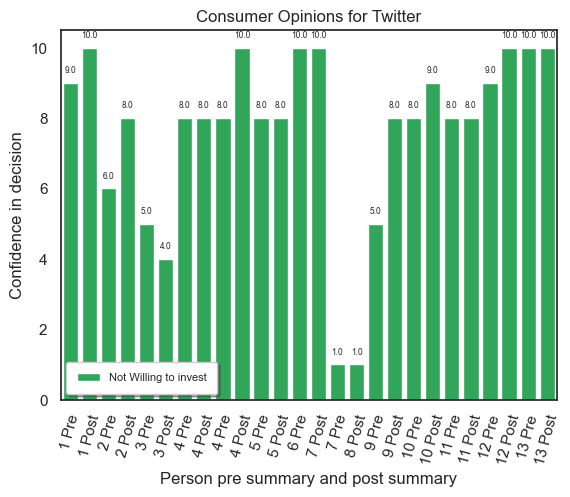

<Figure size 640x480 with 0 Axes>

In [239]:
plot_Company(Twitter)
stats(Twitter)

(count    13.000000
 mean      6.846154
 std       1.573010
 min       4.000000
 25%       6.000000
 50%       7.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      7.692308
 std       1.250641
 min       5.000000
 25%       7.000000
 50%       8.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.846154
 std     -0.322369
 min      1.000000
 25%      1.000000
 50%      1.000000
 75%      0.000000
 max      0.000000
 Name: Conf, dtype: float64)

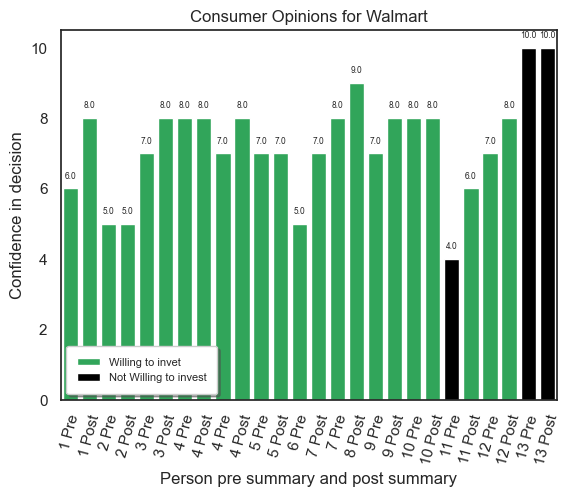

<Figure size 640x480 with 0 Axes>

In [240]:
plot_Company(Walmart)
stats(Walmart)

(count    13.00000
 mean      7.00000
 std       1.95789
 min       3.00000
 25%       6.00000
 50%       7.00000
 75%       8.00000
 max      10.00000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      7.384615
 std       1.709701
 min       4.000000
 25%       7.000000
 50%       7.000000
 75%       9.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.384615
 std     -0.248189
 min      1.000000
 25%      1.000000
 50%      0.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

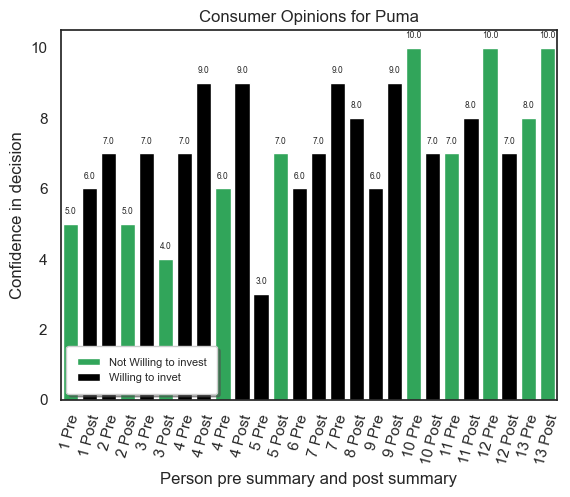

<Figure size 640x480 with 0 Axes>

In [238]:
plot_Company(Puma)
stats(Puma)

(count    13.000000
 mean      7.692308
 std       2.136376
 min       5.000000
 25%       5.000000
 50%       9.000000
 75%       9.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      8.000000
 std       2.645751
 min       1.000000
 25%       8.000000
 50%       9.000000
 75%      10.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.307692
 std      0.509375
 min     -4.000000
 25%      3.000000
 50%      0.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

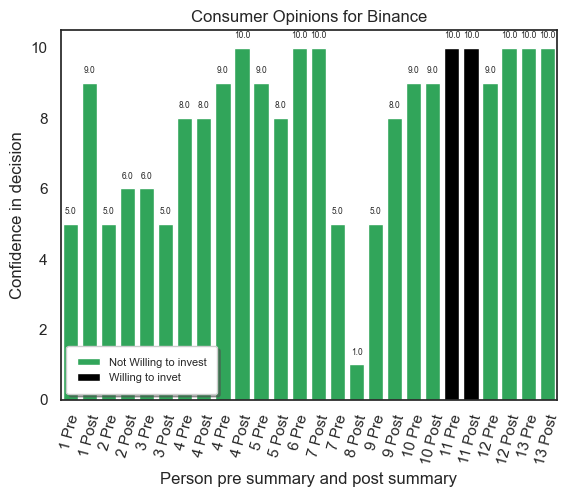

<Figure size 640x480 with 0 Axes>

In [241]:
plot_Company(Binance)
stats(Binance)

(count    13.000000
 mean      7.307692
 std       1.931520
 min       3.000000
 25%       7.000000
 50%       7.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      7.923077
 std       1.552500
 min       5.000000
 25%       7.000000
 50%       7.000000
 75%       9.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.615385
 std     -0.379020
 min      2.000000
 25%      0.000000
 50%      0.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

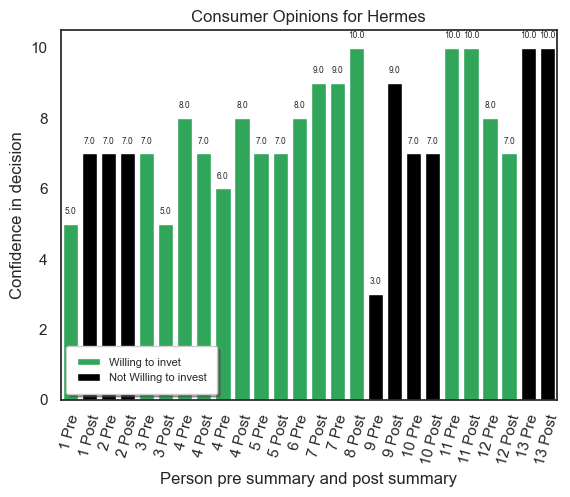

<Figure size 640x480 with 0 Axes>

In [242]:
plot_Company(Hermes)
stats(Hermes)

(count    13.00000
 mean      7.00000
 std       1.47196
 min       5.00000
 25%       6.00000
 50%       7.00000
 75%       8.00000
 max      10.00000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      8.000000
 std       1.080123
 min       7.000000
 25%       7.000000
 50%       8.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     1.000000
 std     -0.391837
 min      2.000000
 25%      1.000000
 50%      1.000000
 75%      0.000000
 max      0.000000
 Name: Conf, dtype: float64)

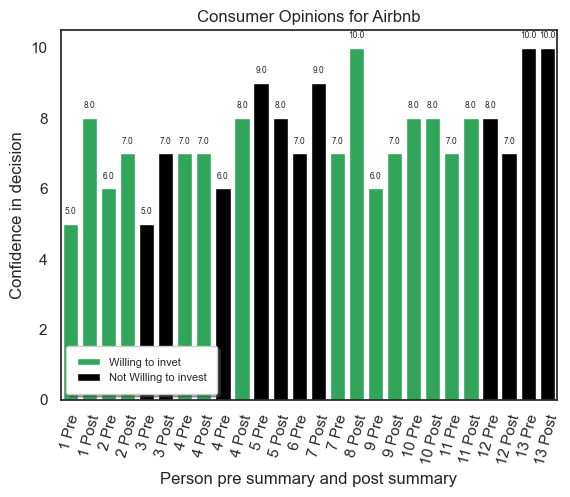

<Figure size 640x480 with 0 Axes>

In [243]:
plot_Company(Airbnb)
stats(Airbnb)

(count    13.000000
 mean      6.076923
 std       1.934836
 min       4.000000
 25%       4.000000
 50%       6.000000
 75%       7.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      6.230769
 std       2.087816
 min       3.000000
 25%       5.000000
 50%       6.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.153846
 std      0.152980
 min     -1.000000
 25%      1.000000
 50%      0.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

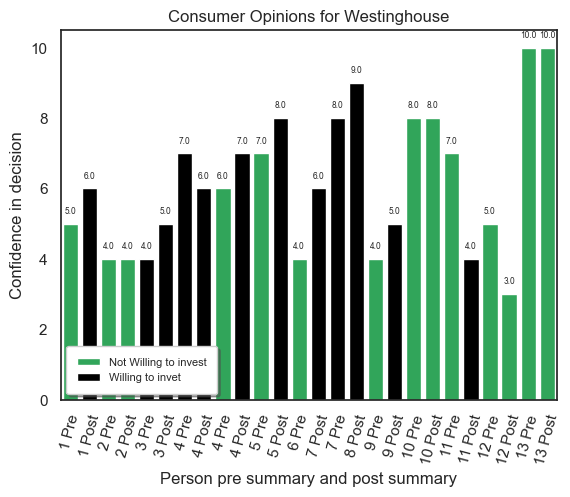

<Figure size 640x480 with 0 Axes>

In [244]:
plot_Company(Westinghouse)
stats(Westinghouse)

(count    13.000000
 mean      7.461538
 std       2.183857
 min       4.000000
 25%       6.000000
 50%       7.000000
 75%      10.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.0
 mean      8.0
 std       2.0
 min       5.0
 25%       6.0
 50%       8.0
 75%      10.0
 max      10.0
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.538462
 std     -0.183857
 min      1.000000
 25%      0.000000
 50%      1.000000
 75%      0.000000
 max      0.000000
 Name: Conf, dtype: float64)

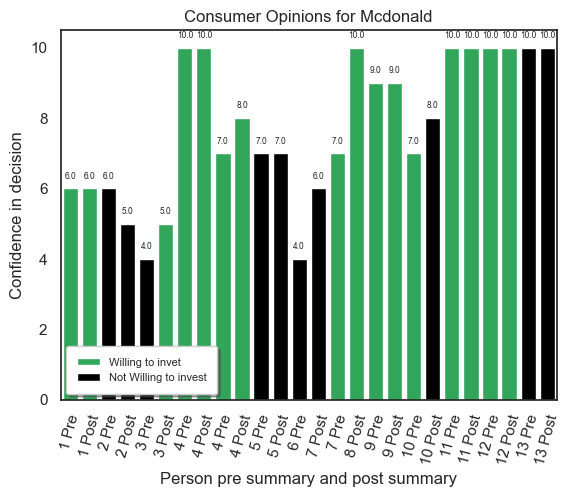

<Figure size 640x480 with 0 Axes>

In [245]:
plot_Company(Mcdonald)
stats(Mcdonald)

(count    13.000000
 mean      6.615385
 std       1.804553
 min       4.000000
 25%       6.000000
 50%       6.000000
 75%       8.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    13.000000
 mean      7.307692
 std       1.931520
 min       3.000000
 25%       6.000000
 50%       8.000000
 75%       9.000000
 max      10.000000
 Name: Conf, dtype: float64,
 count    0.000000
 mean     0.692308
 std      0.126967
 min     -1.000000
 25%      0.000000
 50%      2.000000
 75%      1.000000
 max      0.000000
 Name: Conf, dtype: float64)

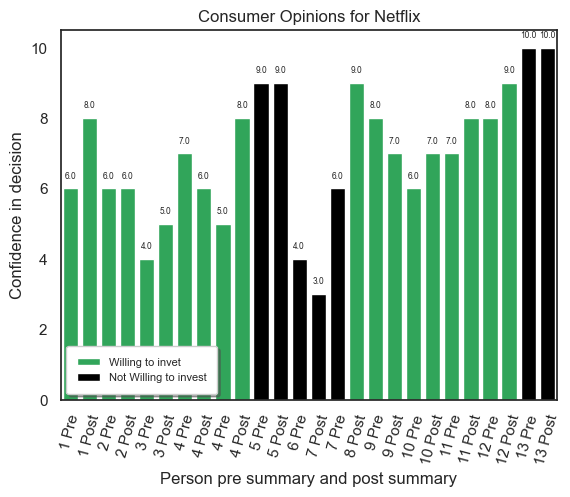

<Figure size 640x480 with 0 Axes>

In [246]:
plot_Company(Netflix)
stats(Netflix)